Connecting Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing dataset and getting the glimpse of data

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/data/car_prediction_data.csv')
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


Shape of the data


In [ ]:
data.shape

(301, 9)

In [ ]:
print(data['Seller_Type'].unique())
print(data['Fuel_Type'].unique())
print(data['Transmission'].unique())
print(data['Owner'].unique())

['Dealer' 'Individual']
['Petrol' 'Diesel' 'CNG']
['Manual' 'Automatic']
[0 1 3]


###Checking for missing values

In [ ]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

Descriptive Statistics of the data

In [ ]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


Final Dataset Extraction

In [ ]:
final_dataset=data[['Year','Selling_Price','Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner']]

In [ ]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


Making current year field

In [ ]:
final_dataset['Current_Year']=2022

In [ ]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2022
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2022
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2022
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2022
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2022


Making number of year field for the dataset

In [ ]:
final_dataset['no_year']=final_dataset['Current_Year']- final_dataset['Year']

In [ ]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,no_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2022,8
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2022,9
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2022,5
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2022,11
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2022,8


Now we will drop the year column because there is no need of it now

In [ ]:
final_dataset.drop(['Year'],axis=1,inplace=True)

In [ ]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,no_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,2022,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,2022,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,2022,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,2022,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,2022,8


Now making categorical column into numerical using get dummies.

In [ ]:
final_dataset=pd.get_dummies(final_dataset,drop_first=True)

In [ ]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Current_Year,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,2022,8,0,1,0,1
1,4.75,9.54,43000,0,2022,9,1,0,0,1
2,7.25,9.85,6900,0,2022,5,0,1,0,1
3,2.85,4.15,5200,0,2022,11,0,1,0,1
4,4.60,6.87,42450,0,2022,8,1,0,0,1


Now we will drop the current year column because there is no need of it now

In [ ]:
final_dataset=final_dataset.drop(['Current_Year'],axis=1)

In [ ]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0,1,0,1
1,4.75,9.54,43000,0,9,1,0,0,1
2,7.25,9.85,6900,0,5,0,1,0,1
3,2.85,4.15,5200,0,11,0,1,0,1
4,4.60,6.87,42450,0,8,1,0,0,1


Now looking at the correlation of each other between columns

In [ ]:
final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
no_year,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


Pairplot for looking at those coorelation graphically

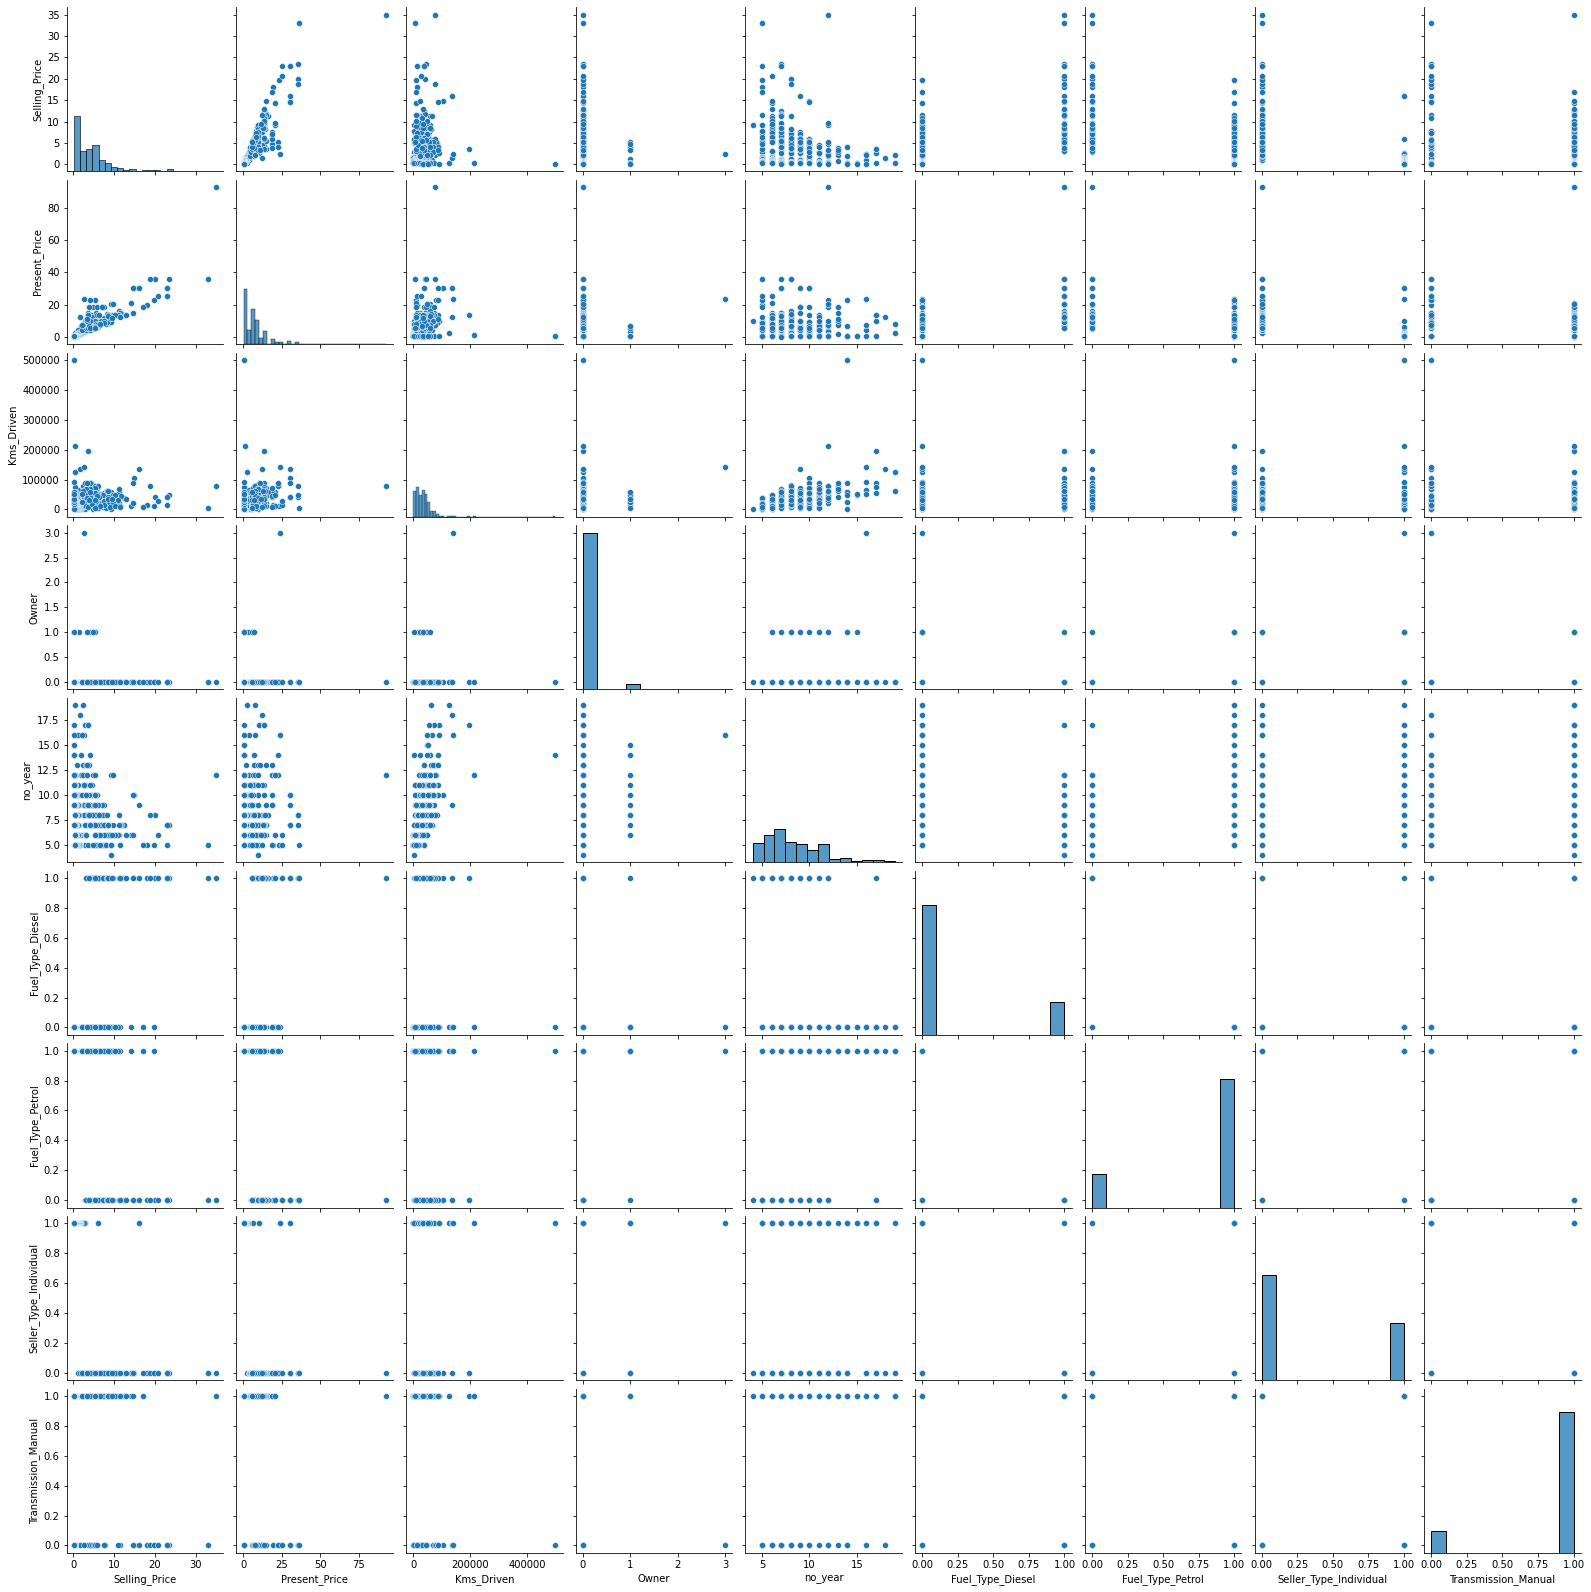

In [ ]:
sns.pairplot(final_dataset)

Visualizing Correlation using heatmap

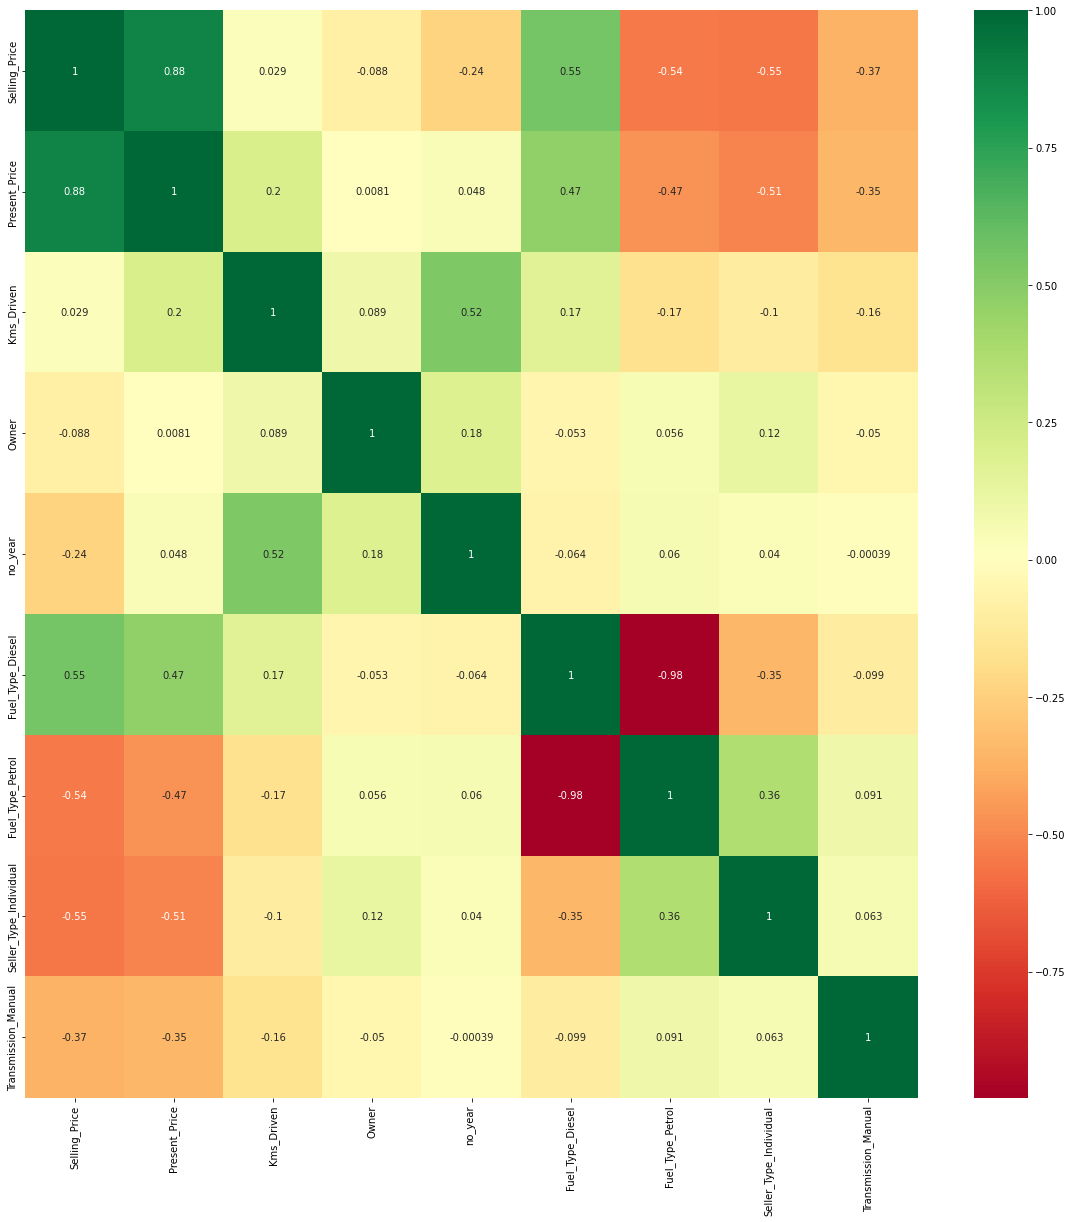

In [ ]:
corrmat = final_dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

g=sns.heatmap(final_dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Separating independent and dependent variables

In [ ]:
X=final_dataset.iloc[:,1:]
y=final_dataset.iloc[:,0]

In [ ]:
X['Owner'].unique()

array([0, 1, 3])

In [ ]:
X.head()

,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,8,0,1,0,1
1,9.54,43000,0,9,1,0,0,1
2,9.85,6900,0,5,0,1,0,1
3,4.15,5200,0,11,0,1,0,1
4,6.87,42450,0,8,1,0,0,1


In [ ]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

Feature Importance

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [ ]:
print(model.feature_importances_)

[0.38004233 0.03850535 0.00044037 0.07865325 0.2216342  0.01133155
 0.13575594 0.13363701]


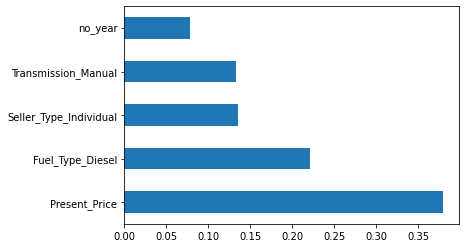

In [ ]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

Splitting the train and test dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Using Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
regressor=RandomForestRegressor()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
 #Randomized Search CV

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [ ]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [ ]:
rf = RandomForestRegressor()

In [ ]:
# Use the random grid to search for best hyperparameters
rf=RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [ ]:
rf.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [ ]:
rf.best_params_

{'max_depth': 25,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [ ]:
rf.best_score_

-4.082710045561973

In [ ]:
predictions=rf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


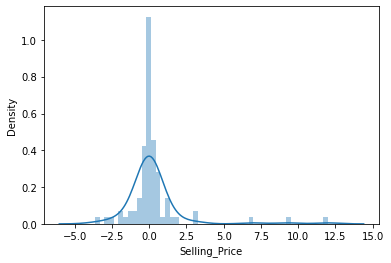

In [ ]:
sns.distplot(y_test-predictions)

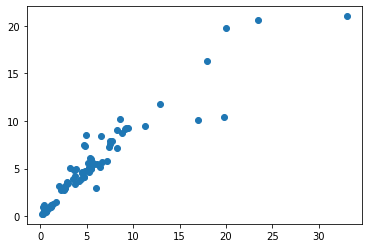

In [ ]:
plt.scatter(y_test,predictions)

In [ ]:
from sklearn import metrics

In [46]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.8768991208791194
MSE: 3.933881722760443
RMSE: 1.9834015535842566


Using XGBoost Regressor

In [47]:
import xgboost as xgb
from scipy.stats import uniform, randint

In [48]:
xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=42)

In [49]:
params = {
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

In [50]:
xgb = RandomizedSearchCV(estimator = xgb_model, param_distributions = params,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [51]:
xgb.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[06:32:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.2s
[06:32:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.0s
[06:32:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.0s
[06:32:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of

RandomizedSearchCV(cv=5, estimator=XGBRegressor(random_state=42), n_jobs=1,
                   param_distributions={'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f75aa577c90>,
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f75aa577d50>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f75aa577f50>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f75aa586790>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f75aa5770d0>},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [52]:
xgb.best_score_

-2.583738185956024

In [53]:
xgb.best_params_

{'gamma': 0.34015376929388985,
 'learning_rate': 0.16514977559086289,
 'max_depth': 3,
 'n_estimators': 103,
 'subsample': 0.9768807022739411}

In [54]:
predictions=xgb.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


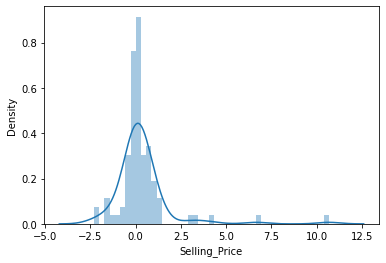

In [55]:
sns.distplot(y_test-predictions)

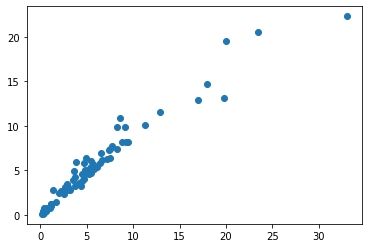

In [56]:
plt.scatter(y_test,predictions)

In [57]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.7469347548091804
MSE: 2.5684632032821106
RMSE: 1.602642568785102


Using Catboost Regresssor

In [59]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 93 kB/s 


In [60]:
from catboost import CatBoostRegressor

In [61]:
cb=CatBoostRegressor()

In [62]:
grid = {'learning_rate': [0.03, 0.1],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9]}

In [63]:
cb = RandomizedSearchCV(estimator = cb, param_distributions = grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [64]:
cb.fit(X_train,y_train)

Streaming output truncated to the last 5000 lines.
4:	learn: 3.8910511	total: 3.14ms	remaining: 625ms
5:	learn: 3.8042501	total: 3.74ms	remaining: 620ms
6:	learn: 3.7335546	total: 4.34ms	remaining: 616ms
7:	learn: 3.6654672	total: 4.92ms	remaining: 610ms
8:	learn: 3.5954819	total: 5.51ms	remaining: 606ms
9:	learn: 3.5235478	total: 6.12ms	remaining: 606ms
10:	learn: 3.4429063	total: 6.75ms	remaining: 607ms
11:	learn: 3.3864070	total: 7.4ms	remaining: 609ms
12:	learn: 3.3191191	total: 7.98ms	remaining: 606ms
13:	learn: 3.2539073	total: 8.56ms	remaining: 603ms
14:	learn: 3.1978092	total: 9.14ms	remaining: 600ms
15:	learn: 3.1368599	total: 9.76ms	remaining: 600ms
16:	learn: 3.0708448	total: 10.4ms	remaining: 603ms
17:	learn: 3.0097992	total: 11.1ms	remaining: 604ms
18:	learn: 2.9556630	total: 11.6ms	remaining: 601ms
19:	learn: 2.9098979	total: 12.2ms	remaining: 599ms
20:	learn: 2.8467741	total: 14.3ms	remaining: 668ms
21:	learn: 2.7881907	total: 14.7ms	remaining: 655ms
22:	learn: 2.7366862

RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostRegressor object at 0x7f75959cb310>,
                   n_jobs=1,
                   param_distributions={'depth': [4, 6, 10],
                                        'l2_leaf_reg': [1, 3, 5, 7, 9],
                                        'learning_rate': [0.03, 0.1]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [65]:
cb.best_score_

-3.2179271237932716

In [66]:
cb.best_params_

{'depth': 4, 'l2_leaf_reg': 9, 'learning_rate': 0.1}

In [67]:
predictions=cb.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


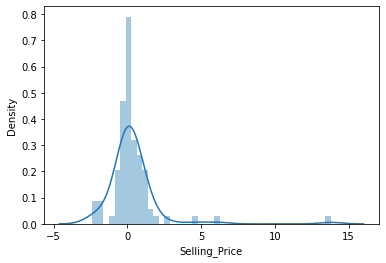

In [68]:
sns.distplot(y_test-predictions)

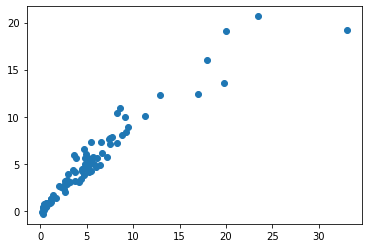

In [69]:
plt.scatter(y_test,predictions)

In [70]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.8568669682476366
MSE: 3.4731227057809524
RMSE: 1.8636315906801302


Using LGBM Regressor

In [71]:
from lightgbm import LGBMRegressor

In [72]:
lb=LGBMRegressor()  

In [73]:
lb.fit(X_train,y_train)

LGBMRegressor()

In [74]:
params = {
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

In [75]:
lb = RandomizedSearchCV(estimator = lb, param_distributions = params,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [76]:
lb.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.0s
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.0s
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.0s
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.0s
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.0s
[CV] END gamma=0.07800932022121826, learning_rate=0.07679835610086079, max_depth=4, n_estimators=110, subsample=0.9464704583099741; total time=   0.0s
[CV] END gamma=0.07800932022121826, le

RandomizedSearchCV(cv=5, estimator=LGBMRegressor(), n_jobs=1,
                   param_distributions={'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f759581c690>,
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f759581c0d0>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f759581c750>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f75e1f5c510>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f759581c890>},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [77]:
lb.best_params_

{'gamma': 0.34015376929388985,
 'learning_rate': 0.16514977559086289,
 'max_depth': 3,
 'n_estimators': 103,
 'subsample': 0.9768807022739411}

In [78]:
lb.best_score_

-5.776105814158411

In [79]:
predictions=lb.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


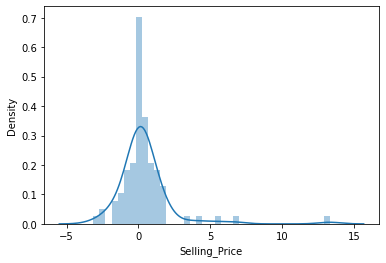

In [80]:
sns.distplot(y_test-predictions)

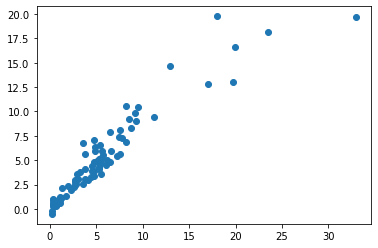

In [81]:
plt.scatter(y_test,predictions)

In [82]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1.0132939743818592
MSE: 3.934934144002637
RMSE: 1.9836668429962319
